#Nama : Nabila Sukmanegara

#IMPORT LIBRARY

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [2]:
# Mengatur random seed untuk reproducibility
torch.manual_seed(42)

#MEMUAT DATA MNIST

In [3]:
#Transformasi data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#Mengunduh Dataset
train_dataset = datasets.MNIST('.', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST('.', train=False, transform=transform, download=True)
#Data Loader
#Data loader digunakan untuk memuat data dalam bentuk batch selama pelatihan  dan pengujian.
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 157011530.64it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 15083513.11it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37171220.32it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11687440.96it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



#VISUALISASI DATA

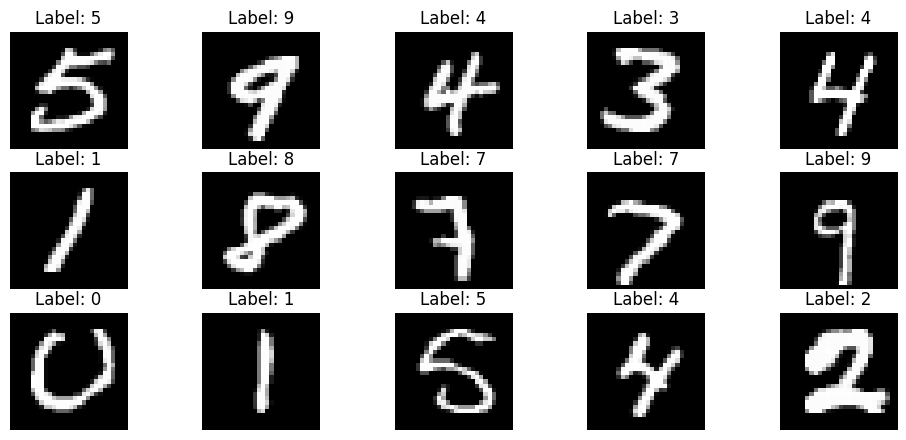

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menampilkan gambar-gambar dari dataset
def show_images(images, labels, ncols=5):
    plt.figure(figsize=(12, 7))
    for i in range(len(images)):
        plt.subplot(len(images) // ncols + 1, ncols, i + 1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# mengambil beberapa contoh gambar dari dataset
# Ubah sesuai dengan jumlah contoh yang ingin Anda tampilkan
num_samples = 15
sample_indices = np.random.choice(len(train_dataset), num_samples, replace=False)
sample_images = [train_dataset[i] for i in sample_indices]
sample_images_data, sample_labels = zip(*sample_images)

# Tampilkan contoh gambar dalam bentuk grid
show_images(sample_images_data, sample_labels)

# Coding ini membantu untuk mendapatkan gambaran visual tentang contoh-contoh gambar dalam dataset MNIST


Output yang dihasilkan adalah grid gambar-gambar contoh dari dataset MNIST bersama dengan label-labelnya.

- Setiap gambar ditampilkan dalam bentuk kotak, dan angka-angka di dalamnya mewakili nilai piksel dari gambar tersebut.
- Setiap kotak juga memiliki label di bawahnya, menunjukkan digit yang dilambangkan oleh gambar tersebut (yaitu angka yang sebenarnya dalam gambar).
- Gambar-gambar ini dipilih secara acak dari dataset pelatihan, jadi setiap kali Anda menjalankan program, Anda akan melihat contoh gambar yang berbeda.

# Rancang Model Jaringan Neural


In [5]:
# Implementasi dari sebuah model jaringan neural menggunakan PyTorch

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)
    # mendefinisikan bagaimana data melalui jaringan saat dilakukan proses "forward pass"
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)
# Melatih dan menguji data
model = NeuralNetwork()

#Persiapan Hyperparameter seperti Fungsi Kerugian, optimalisasi, kecepatan pembelajaran.

In [6]:
#Fungsi kerugian
criterion = nn.CrossEntropyLoss()

In [7]:
#Optimalisasi
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [8]:
#Kecepatan Pembelajaran
learning_rate = 0.01

#PELATIHAN MODEL

In [9]:
#Menentukan berapa kali model akan melihat keseluruhan dataset pelatihan selama proses pelatihan
#Setiap kali seluruh dataset dilalui, itu disebut sebagai satu epoch
num_epochs = 10

#Loop pelatihan
#Setiap iterasi dari loop ini mewakili satu epoch pelatihan.
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    #Loop dalam batch
    #Setiap iterasi dari loop ini memproses satu batch data
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        # Setiap iterasi dari loop ini memproses satu batch data
        optimizer.zero_grad()
        # Model menghasilkan prediksi menggunakan input batch
        outputs = model(inputs)
        #Menghitung nilai loss (kerugian) antara output prediksi dan label target
        loss = criterion(outputs, labels)
        # Menghitung gradien loss terhadap parameter model
        loss.backward()
        # Memperbarui bobot model menggunakan gradien yang dihitung sebelumnya
        optimizer.step()
        #Menyimpan total loss selama satu epoch untuk dihitung rata-rata loss per batch
        total_loss += loss.item()
    #Ini mencetak status pelatihan
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader)}')

# Mencetak pelatihan seluruh jumlah epoch yang ditentukan
print('Finished Training')


Epoch 1/10, Loss: 1.8069171595420919
Epoch 2/10, Loss: 1.5674844346066783
Epoch 3/10, Loss: 1.5505780651371108
Epoch 4/10, Loss: 1.5400817443821222
Epoch 5/10, Loss: 1.529917905071397
Epoch 6/10, Loss: 1.5230199520521834
Epoch 7/10, Loss: 1.516944193509596
Epoch 8/10, Loss: 1.5117930767378573
Epoch 9/10, Loss: 1.5076141617953904
Epoch 10/10, Loss: 1.5041929904077607
Finished Training


#EVALUASI MODEL

Menguji performa model pada dataset uji dan menghitung akurasi model menggunakan metrik akurasi (accuracy).

In [10]:
import torch
from sklearn.metrics import accuracy_score

# Inisialisasi variabel untuk menghitung akurasi
correct = 0
total = 0
all_labels = []
all_predictions = []

# Set model ke mode evaluasi
model.eval()

# Evaluasi model pada data uji
with torch.no_grad():
    for inputs, labels in test_loader:
        # Hitung output dari model
        outputs = model(inputs)

        # Dapatkan prediksi menggunakan argmax
        _, predicted = torch.max(outputs.data, 1)

        # Tambahkan label sebenarnya dan prediksi ke dalam list
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

        # Hitung jumlah prediksi yang benar
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Menghitung akurasi menggunakan accuracy_score
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 95.70%


In [11]:
# Menghitung dan menampilkan matriks konfusi berdasarkan prediksi yang dihasilkan oleh model dan label sebenarnya pada dataset uji
from sklearn.metrics import confusion_matrix

# Matriks konfusi
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[ 966    0    0    3    0    5    4    1    1    0]
 [   0 1123    3    2    0    1    3    2    1    0]
 [  13    2  973    9    4    0    5   19    6    1]
 [   1    2    8  974    1    5    0   13    5    1]
 [   2    6    4    0  917    2   11    4    9   27]
 [   6    1    0   11    1  850    9    2    8    4]
 [  11    3    0    1    1   10  924    2    6    0]
 [   1   10   12    1    0    1    0 1000    2    1]
 [   3    5    3   15    3   10    4   14  916    1]
 [  10    8    1   13    9   12    1   21    7  927]]


In [12]:
#Menghasilkan dan mencetak laporan klasifikasi yang merinci beberapa metrik evaluasi kinerja model klasifikasi
from sklearn.metrics import classification_report

#Skor F1, Presisi, dan recall
report = classification_report(all_labels, all_predictions, target_names=[str(i) for i in range(10)])
print('Classification Report:')
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.94      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.98      0.93      0.96       982
           5       0.95      0.95      0.95       892
           6       0.96      0.96      0.96       958
           7       0.93      0.97      0.95      1028
           8       0.95      0.94      0.95       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



#Hasil secara keseluruhan

1. Berhasil memuat data MNIST menggunakan PyTorch dan memvisualisasikan beberapa sampel gambar dari dataset.
2. Merancang model jaringan neural dengan tiga lapisan linear (fully connected) untuk menangani tugas klasifikasi digit MNIST.
3. Melatih model menggunakan data pelatihan, menghitung loss pada setiap epoch, dan menyimpan model yang memiliki loss terendah.
4. Mengevaluasi model menggunakan beberapa metrik performa termasuk akurasi, matriks konfusi, skor F1, presisi, dan perolehan. Model memiliki akurasi sekitar 95.70%, yang menunjukkan kinerja yang baik pada dataset uji.
5. Dalam Classification Report, akurasi model adalah 96%, yang berarti model dengan benar mengklasifikasikan 96% dari total sampel uji. Semakin tinggi nilai presisi, recall, dan f1-score, semakin baik model dapat mengklasifikasikan sampel dalam setiap kelas.